# Module 03 Review

1. Dicussion on general topics
2. XGBoost Library and Gradient Boosted Trees


## 1. Discussion on General Topics

**Class Github:** https://byui-cse.github.io/cse450-course/

*   .map() https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html
*   Reading Technical Documentation: https://byui-cse.github.io/cse450-course/course/reading-technical-documentation.html

**Holdout Set Predictions**
*  Holdout set preditions can be submitted early and resubmitted mulitple times.
*  Use the Mini Holdout set and the corresponding notebook to understand performance and to get an idea of how well you will perform on the holdout set.

**Overfitting:**
Why would a model perform well when training and testing but when the holdout set is applied the model performed poorly?

How to prevent overfitting?
*   Make changes to the Data.
*   Tune the parameters in the model.

**Ensemble methods** use multiple models that by themselves are weak learners but combined can predict very well. You are basically building multiple experts at classifying specific subsets of the data.

**Bagging Method:** Combining multiple learners that learn independently and in parallel.

**Boosting Method:** Combining multiple learners that learn sequentially and adapt to improve performance.

**Model evaluation options for Continuous Targets:**

* *Mean squared error (MSE):* captures the average differences between the expected values and predicted values. The smaller the value the better the performance. Be careful because this is relative and domain specific.

* *Root mean squared error (RMSE):* is the square root of MSE. It provides the same information but in the same units as the target values. Smaller values indicate better performance. Be careful because this is relative and domain specific. RMSE overemphasizes large differences. In other words, if the data you are measuring against has a lot of outliers then RMSE will be larger. RMSE is most effective when the data is not expected to have a lot of outliers.

* *Mean absolute error (MAE):*  also captures average differences but in a linear way. Not influenced by large or small differences. Represented in the target value units. MAE is most effective when outliers are expected.  Also relative and domain specific.

* *R-squared coefficient (R2):* Ranges from 0 to 1. The closer the value is to 1 the better the performance of the model. R2 shows how well your model explains the variance in the target variable. For example if R2 is .70 that means your model explained 70% of the variance in the target values. This metric is not relative or domain specific.

**Supervised Learning has two main categories:**

* **Classification:** Prediction of labels or classes.

* **Regression** Prediction of a continuous value.


## 2. XGBoost Library and Gradient Boosted Trees



**XGBoost library** is used to implement gradient boosted trees ML models. https://xgboost.readthedocs.io/en/latest/


**Gradient boosting:** Is an algo that minimizes the difference between the predicted values and the actual values (minimizing of the loss function). The idea is that the next model minimizes the overall prediction error.

**What does Gradient mean?** The gradual adjustment of subsequent trees to minimize the loss function.

**What does boost mean?** The dependency of using prior trees to improve the next.

# Module 03 Bonus

In [ ]:
# Import data and dependencies
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

housing = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20000 non-null  int64  
 1   date           20000 non-null  object 
 2   bedrooms       20000 non-null  int64  
 3   bathrooms      20000 non-null  float64
 4   sqft_living    20000 non-null  int64  
 5   sqft_lot       20000 non-null  int64  
 6   floors         20000 non-null  float64
 7   waterfront     20000 non-null  int64  
 8   view           20000 non-null  int64  
 9   condition      20000 non-null  int64  
 10  grade          20000 non-null  int64  
 11  sqft_above     20000 non-null  int64  
 12  sqft_basement  20000 non-null  int64  
 13  yr_built       20000 non-null  int64  
 14  yr_renovated   20000 non-null  int64  
 15  zipcode        20000 non-null  int64  
 16  lat            20000 non-null  float64
 17  long           20000 non-null  float64
 18  sqft_l

In [ ]:
import numpy as np
# Create a function to calculate the distance between city center and house.
def citycenterdistance(lat,lon):

  # Settle City Center Lat and Lon
  point1 = np.array((47.60692523857865, -122.34001240668884))
  point2 = np.array((lat, lon))

  # calculating Euclidean distance using linalg.norm()
  return np.linalg.norm(point1 - point2)


In [ ]:
# Calculate Distance to city center
# lambda function is an anonymous function used to execute simple expressions
# Syntax - lambda [argument variable] : [expression]
housing['distance'] = housing.apply(lambda x: citycenterdistance(x.lat, x.long), axis=1)

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20000 non-null  int64  
 1   date           20000 non-null  object 
 2   bedrooms       20000 non-null  int64  
 3   bathrooms      20000 non-null  float64
 4   sqft_living    20000 non-null  int64  
 5   sqft_lot       20000 non-null  int64  
 6   floors         20000 non-null  float64
 7   waterfront     20000 non-null  int64  
 8   view           20000 non-null  int64  
 9   condition      20000 non-null  int64  
 10  grade          20000 non-null  int64  
 11  sqft_above     20000 non-null  int64  
 12  sqft_basement  20000 non-null  int64  
 13  yr_built       20000 non-null  int64  
 14  yr_renovated   20000 non-null  int64  
 15  zipcode        20000 non-null  int64  
 16  lat            20000 non-null  float64
 17  long           20000 non-null  float64
 18  sqft_l

In [ ]:
# Split features from target
X = housing.drop(columns=['id','date','price','zipcode', 'sqft_lot15', 'yr_renovated'])
y = housing['price']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       20000 non-null  int64  
 1   bathrooms      20000 non-null  float64
 2   sqft_living    20000 non-null  int64  
 3   sqft_lot       20000 non-null  int64  
 4   floors         20000 non-null  float64
 5   waterfront     20000 non-null  int64  
 6   view           20000 non-null  int64  
 7   condition      20000 non-null  int64  
 8   grade          20000 non-null  int64  
 9   sqft_above     20000 non-null  int64  
 10  sqft_basement  20000 non-null  int64  
 11  yr_built       20000 non-null  int64  
 12  lat            20000 non-null  float64
 13  long           20000 non-null  float64
 14  sqft_living15  20000 non-null  int64  
 15  distance       20000 non-null  float64
dtypes: float64(5), int64(11)
memory usage: 2.4 MB


In [ ]:
# Create taining and test sets
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.30, random_state=41)

In [ ]:
from xgboost import XGBRegressor
# Create the model
# Objective - Loss function for regression problems.
# learning_rate - is the weight that slows the learning of the model.
# n_estimators - the number of trees
model = XGBRegressor(objective ='reg:squarederror',max_depth=7,learning_rate=.01,random_state=3,n_estimators=965)


# Train the model
model.fit(X_train, y_train)

#  Predict using the trained model
predictions = model.predict(X_test)

# Evaluate performance
result = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test,predictions)
print(result,r2)


132205.77113667445 0.8695810282319199


[0.00452846 0.00869649 0.23791602 0.00696187 0.0029864  0.09442835
 0.04792749 0.00490352 0.42655462 0.01406086 0.00337029 0.00928918
 0.05395611 0.00790087 0.02315548 0.05336387] ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long', 'sqft_living15', 'distance']


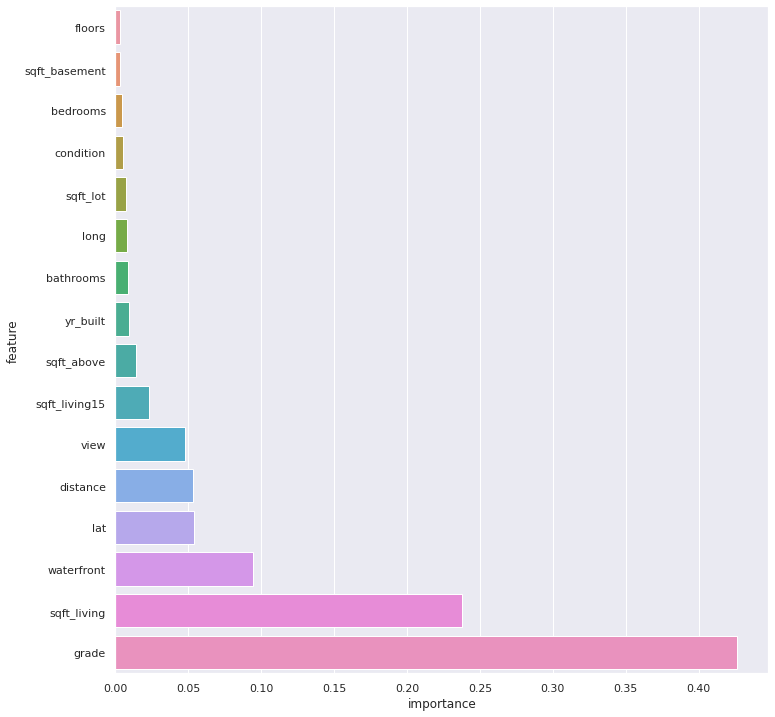

In [ ]:
import seaborn as sns
importance = model.feature_importances_
df = pd.DataFrame(list(zip(importance, X.columns.to_list())),columns =['importance', 'feature'])
print(importance,X.columns.to_list())
df.head()
df = df.sort_values(by='importance')
sns.set(rc={'figure.figsize':(11.7,12.27)})
sns.barplot(data=df,x='importance',y='feature')

In [ ]:
# Import holdout set
holdout = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing_holdout_test.csv")

In [ ]:
holdout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1613 entries, 0 to 1612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1613 non-null   int64  
 1   date           1613 non-null   object 
 2   bedrooms       1613 non-null   int64  
 3   bathrooms      1613 non-null   float64
 4   sqft_living    1613 non-null   int64  
 5   sqft_lot       1613 non-null   int64  
 6   floors         1613 non-null   float64
 7   waterfront     1613 non-null   int64  
 8   view           1613 non-null   int64  
 9   condition      1613 non-null   int64  
 10  grade          1613 non-null   int64  
 11  sqft_above     1613 non-null   int64  
 12  sqft_basement  1613 non-null   int64  
 13  yr_built       1613 non-null   int64  
 14  yr_renovated   1613 non-null   int64  
 15  zipcode        1613 non-null   int64  
 16  lat            1613 non-null   float64
 17  long           1613 non-null   float64
 18  sqft_liv

In [ ]:
# Calculate Distance to city center for holdout set
holdout['distance'] = holdout.apply(lambda x: citycenterdistance(x.lat, x.long), axis=1)

In [ ]:
# Clean holdout set
holdout = holdout.drop(columns=['id','date'])
holdout = holdout.drop(columns=['zipcode', 'sqft_lot15', 'yr_renovated'])

In [ ]:
# Predict house prices for holdout set
holdout_predictions = model.predict(holdout)

In [ ]:
# Import holdout house prices answers
answers = pd.read_csv("module3-holdout-answers.csv")

In [ ]:
# Evaluate results
result = mean_squared_error(answers, holdout_predictions, squared=False)
r2 = r2_score(y_test,predictions)
print(result,r2)

151459.37238617742 0.8695810282319199


# Module 04 Introduction
**What is an ANN?**
1. Data is fed into the neural network as input information.

2. Weights and bias are configured in the hidden layer.

3. Neurons run mathematical calculations (Activation functions) to figure out whether to pass information on to the next neuron in the hidden layer.

4. The network attempts to do this over and over, each time strengthening the connections that lead to success and diminishing those that lead to failure.

5. Once the network has optimized it produces predictions as the output from the hidden layer.

6. Building the neural network requires configuring the layers of the model, then compiling the model.

**Build->Compile->Model->Fit->Predict**

In [ ]:
# Load some test data and import dependencies
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

mpg = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/mpg.csv')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
# Horsepower has some missing values, represented as '?'
mpg[mpg['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [ ]:
# need to deal with ?s in the data
mpg.loc[[32],'horsepower'] = 72
mpg.loc[[126],'horsepower'] = 85
mpg.loc[[330],'horsepower'] = 64
mpg.loc[[354],'horsepower'] = 83
mpg.loc[[336],'horsepower'] = 75
mpg.loc[[374],'horsepower'] = 90

In [ ]:
# one hot encode origin
mpg['origin'] = mpg['origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

mpg = pd.get_dummies(mpg, columns=['origin'], prefix='', prefix_sep='', drop_first= True)

In [ ]:
# Get our target variable and features and split them into test and train datasets
y = mpg['mpg']
X = mpg.drop(columns=['mpg','name'])
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.3, random_state=42)
X

,cylinders,displacement,horsepower,weight,acceleration,year,Japan,USA
0,8,307.0,130,3504,12.0,70,0,1
1,8,350.0,165,3693,11.5,70,0,1
2,8,318.0,150,3436,11.0,70,0,1
3,8,304.0,150,3433,12.0,70,0,1
4,8,302.0,140,3449,10.5,70,0,1
...,...,...,...,...,...,...,...,...
393,4,140.0,86,2790,15.6,82,0,1
394,4,97.0,52,2130,24.6,82,0,0
395,4,135.0,84,2295,11.6,82,0,1
396,4,120.0,79,2625,18.6,82,0,1


In [ ]:
# fit scaler on training data
#MinMax scales data between 0 and 1
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train = norm.transform(X_train)

# transform testing data
X_test = norm.transform(X_test)
X_train

array([[0.2       , 0.05675676, 0.03804348, 0.        , 0.55279503,
        0.5       , 1.        , 0.        ],
       [0.2       , 0.13513514, 0.17934783, 0.26265823, 0.62732919,
        1.        , 0.        , 1.        ],
       [0.6       , 0.43783784, 0.29347826, 0.26550633, 0.27950311,
        0.08333333, 0.        , 1.        ],
       [1.        , 0.67027027, 0.56521739, 0.67879747, 0.29192547,
        0.5       , 0.        , 1.        ],
       [1.        , 0.67027027, 0.56521739, 0.77278481, 0.37267081,
        0.25      , 0.        , 1.        ],
       [0.2       , 0.07297297, 0.22826087, 0.09651899, 0.49689441,
        0.16666667, 1.        , 0.        ],
       [0.2       , 0.18918919, 0.25      , 0.33860759, 0.49068323,
        1.        , 0.        , 1.        ],
       [1.        , 1.        , 0.91847826, 0.93037975, 0.1552795 ,
        0.25      , 0.        , 1.        ],
       [1.        , 0.51351351, 0.34782609, 0.71677215, 0.65217391,
        0.58333333, 0.      

In [ ]:
# build a neural network using a sequential model
# input layer node size is the same as the training columns
# hidden layers: 128 node layer, 256 node layer, 64 node layer
# hidden layer has a dropout technique applied to prevent overfitting. When the Dropout() is applied, randomly selected neurons are ignored during training. The probability of droping nuerons is the parameter.
# Dropout info: https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/
# a single node output layer
"""
Output Layer:
regression - single neuron
binary classification - single neuron
multi-class classification - Multiple neurons, one for each class."""

model = Sequential()
model.add(Dense(128, input_dim=len(X_train[0]), activation='sigmoid')) #input and first hidden layer
model.add(Dropout(.5))
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))

model.add(Dense(1, activation='relu'))

In [ ]:
# Display model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               1152      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 dense_6 (Dense)             (None, 64)                16448     
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 50,689
Trainable params: 50,689
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the NN model
# Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
# Optimizer — This is how the model is updated based on the data it sees and its loss function.
# Metrics — Used to monitor the training and testing steps. The following example uses MSE.
model.compile(loss="mean_squared_error", optimizer="adam", metrics=['mse'])

In [ ]:
# Configuration provided to the model to stop training if certain metric doesn't improve after a certain number of epochs.
early_stop = keras.callbacks.EarlyStopping(monitor='val_mse', patience=30)
# Train the model with training data
# epoch - Indicates the number of passes of the entire training dataset.
# validation_split - spliting the training data for validation
# batch_size - the size of each batch used to train the NN
# callbacks - the configuration to stop training if certain metrics don't improve.
# shuffle - whether to shuffle the data before each epoch
history = model.fit(X_train, y_train, epochs=2000, validation_split=.35, batch_size=20, callbacks=[early_stop],shuffle=False)
# See how the NN improves with each pass
hist = pd.DataFrame(history.history)

Epoch 1/2000
4/4 [==============================] - 1s 51ms/step - loss: 529.4200 - mse: 529.4201 - val_loss: 556.3434 - val_mse: 556.3434
Epoch 2/2000
4/4 [==============================] - 0s 12ms/step - loss: 462.2166 - mse: 462.2166 - val_loss: 493.8298 - val_mse: 493.8298
Epoch 3/2000
4/4 [==============================] - 0s 12ms/step - loss: 410.7422 - mse: 410.7422 - val_loss: 449.3677 - val_mse: 449.3677
Epoch 4/2000
4/4 [==============================] - 0s 11ms/step - loss: 375.4716 - mse: 375.4716 - val_loss: 420.4260 - val_mse: 420.4260
Epoch 5/2000
4/4 [==============================] - 0s 16ms/step - loss: 352.0115 - mse: 352.0115 - val_loss: 402.0788 - val_mse: 402.0788
Epoch 6/2000
4/4 [==============================] - 0s 13ms/step - loss: 337.2516 - mse: 337.2516 - val_loss: 389.8315 - val_mse: 389.8315
Epoch 7/2000
4/4 [==============================] - 0s 11ms/step - loss: 327.0492 - mse: 327.0492 - val_loss: 380.7849 - val_mse: 380.7849
Epoch 8/2000
4/4 [=========

In [ ]:
# View history in a df
hist.head()

,loss,mse,val_loss,val_mse
0,529.420044,529.420105,556.343445,556.343445
1,462.216644,462.216644,493.829803,493.829803
2,410.742249,410.742249,449.367706,449.367706
3,375.471619,375.471619,420.425964,420.425964
4,352.011536,352.011536,402.078766,402.078766


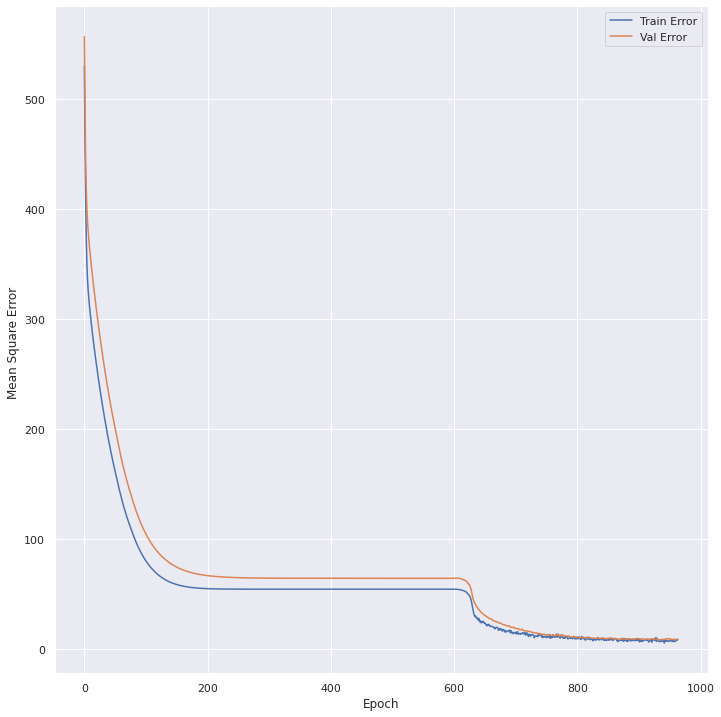

In [ ]:
# plot history
hist = hist.reset_index()
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error ')
plt.plot(hist['index'], hist['mse'], label='Train Error')
plt.plot(hist['index'], hist['val_mse'], label = 'Val Error')
plt.legend()

In [ ]:
# Make predictions
predictions = np.round(model.predict(X_test),1)

9/9 [==============================] - 0s 2ms/step


In [ ]:
# View the RMSE
result = mean_squared_error(y_test, predictions, squared=False)
result

3.26019705826848

In [ ]:
# View r2 score
r2 = r2_score(y_test,predictions)
r2

0.8298043509443118